## 1.Import Libraries

In [5]:
import numpy as np

import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt

import eda_helper_functions

from sklearn.ensemble import IsolationForest

## 2.Reading the Training Data

In [6]:
file_path=r"/Users/akashjaiswal/Downloads/flight_project/data/train.csv"
train=pd.read_csv(file_path)
train

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Indigo,2019-05-03,Banglore,Delhi,10:10:00,13:00:00,170,0.0,No Info,3943
1,Jet Airways,2019-03-09,Banglore,New Delhi,08:00:00,10:25:00,1585,1.0,In-flight meal not included,11087
2,Air India,2019-05-09,Delhi,Cochin,09:45:00,23:00:00,795,1.0,No Info,7174
3,Jet Airways,2019-06-01,Delhi,Cochin,11:40:00,19:00:00,440,2.0,In-flight meal not included,15812
4,Indigo,2019-06-18,Banglore,Delhi,04:00:00,06:50:00,170,0.0,No Info,3943
...,...,...,...,...,...,...,...,...,...,...
635,Jet Airways,2019-05-27,Delhi,Cochin,11:30:00,19:00:00,450,1.0,In-flight meal not included,9732
636,Indigo,2019-03-21,Banglore,New Delhi,14:25:00,19:25:00,300,1.0,No Info,7708
637,Indigo,2019-03-15,Mumbai,Hyderabad,21:20:00,22:45:00,85,0.0,No Info,2754
638,Multiple Carriers,2019-03-27,Delhi,Cochin,12:50:00,19:15:00,385,1.0,No Info,6953


In [7]:
train.dtypes

airline             object
date_of_journey     object
source              object
destination         object
dep_time            object
arrival_time        object
duration             int64
total_stops        float64
additional_info     object
price                int64
dtype: object

In [8]:
train=train.assign(**{
    col:pd.to_datetime(train.loc[:,col],format='mixed')
    for col in ["date_of_journey","dep_time","arrival_time"]
}
            )
train.dtypes

airline                    object
date_of_journey    datetime64[ns]
source                     object
destination                object
dep_time           datetime64[ns]
arrival_time       datetime64[ns]
duration                    int64
total_stops               float64
additional_info            object
price                       int64
dtype: object

In [9]:
train

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Indigo,2019-05-03,Banglore,Delhi,2025-09-03 10:10:00,2025-09-03 13:00:00,170,0.0,No Info,3943
1,Jet Airways,2019-03-09,Banglore,New Delhi,2025-09-03 08:00:00,2025-09-03 10:25:00,1585,1.0,In-flight meal not included,11087
2,Air India,2019-05-09,Delhi,Cochin,2025-09-03 09:45:00,2025-09-03 23:00:00,795,1.0,No Info,7174
3,Jet Airways,2019-06-01,Delhi,Cochin,2025-09-03 11:40:00,2025-09-03 19:00:00,440,2.0,In-flight meal not included,15812
4,Indigo,2019-06-18,Banglore,Delhi,2025-09-03 04:00:00,2025-09-03 06:50:00,170,0.0,No Info,3943
...,...,...,...,...,...,...,...,...,...,...
635,Jet Airways,2019-05-27,Delhi,Cochin,2025-09-03 11:30:00,2025-09-03 19:00:00,450,1.0,In-flight meal not included,9732
636,Indigo,2019-03-21,Banglore,New Delhi,2025-09-03 14:25:00,2025-09-03 19:25:00,300,1.0,No Info,7708
637,Indigo,2019-03-15,Mumbai,Hyderabad,2025-09-03 21:20:00,2025-09-03 22:45:00,85,0.0,No Info,2754
638,Multiple Carriers,2019-03-27,Delhi,Cochin,2025-09-03 12:50:00,2025-09-03 19:15:00,385,1.0,No Info,6953


## 3.High level summary

In [10]:
train .info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   airline          640 non-null    object        
 1   date_of_journey  640 non-null    datetime64[ns]
 2   source           640 non-null    object        
 3   destination      640 non-null    object        
 4   dep_time         640 non-null    datetime64[ns]
 5   arrival_time     640 non-null    datetime64[ns]
 6   duration         640 non-null    int64         
 7   total_stops      640 non-null    float64       
 8   additional_info  640 non-null    object        
 9   price            640 non-null    int64         
dtypes: datetime64[ns](3), float64(1), int64(2), object(4)
memory usage: 50.1+ KB


In [11]:
train.describe(include="number")

,duration,total_stops,price
count,640.000000,640.000000,640.000000
mean,608.265625,0.793750,9054.425000
std,484.420624,0.636372,4331.191325
min,75.000000,0.000000,1965.000000
25%,175.000000,0.000000,5579.500000
50%,480.000000,1.000000,8366.000000
75%,886.250000,1.000000,12373.000000
max,2860.000000,3.000000,31945.000000


In [12]:
(
    train
    .assign(total_stops=train["total_stops"].astype(object))
    .describe(include="O")
    .dtypes
)
    

airline             object
source              object
destination         object
total_stops        float64
additional_info     object
dtype: object

In [13]:
train.describe(include="O")

,airline,source,destination,additional_info
count,640,640,640,640
unique,9,5,6,3
top,Jet Airways,Delhi,Cochin,No Info
freq,232,279,279,498


## 4.High-level analysis of Missing Values

In [15]:
eda_helper_functions.missing_info(train)

,count,percentage
variable,,


## High-level analysis for outliers

In [16]:
forest=IsolationForest(n_estimators=10,random_state=42)

In [17]:
(
    train
    .assign(outlier=forest.fit_predict(train
        .drop(columns="price")
        .select_dtypes(include="number")))
    .query("outlier==-1")
    # .duration
    # .describe()
)

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price,outlier
1,Jet Airways,2019-03-09,Banglore,New Delhi,2025-09-03 08:00:00,2025-09-03 10:25:00,1585,1.0,In-flight meal not included,11087,-1
3,Jet Airways,2019-06-01,Delhi,Cochin,2025-09-03 11:40:00,2025-09-03 19:00:00,440,2.0,In-flight meal not included,15812,-1
7,Spicejet,2019-06-06,Mumbai,Hyderabad,2025-09-03 05:45:00,2025-09-03 07:15:00,90,0.0,No check-in baggage included,2647,-1
8,Jet Airways,2019-05-21,Kolkata,Banglore,2025-09-03 20:00:00,2025-09-03 18:15:00,1335,1.0,In-flight meal not included,10844,-1
18,Indigo,2019-06-24,Mumbai,Hyderabad,2025-09-03 09:10:00,2025-09-03 10:40:00,90,0.0,No Info,4049,-1
...,...,...,...,...,...,...,...,...,...,...,...
629,Jet Airways,2019-04-01,Kolkata,Banglore,2025-09-03 18:55:00,2025-09-03 20:45:00,1550,1.0,In-flight meal not included,7064,-1
630,Air India,2019-03-24,Mumbai,Hyderabad,2025-09-03 13:55:00,2025-09-03 15:25:00,90,0.0,No Info,2575,-1
634,Indigo,2019-06-03,Chennai,Kolkata,2025-09-03 13:15:00,2025-09-03 15:35:00,140,0.0,No Info,3597,-1
637,Indigo,2019-03-15,Mumbai,Hyderabad,2025-09-03 21:20:00,2025-09-03 22:45:00,85,0.0,No Info,2754,-1


## 6.Pair Plots

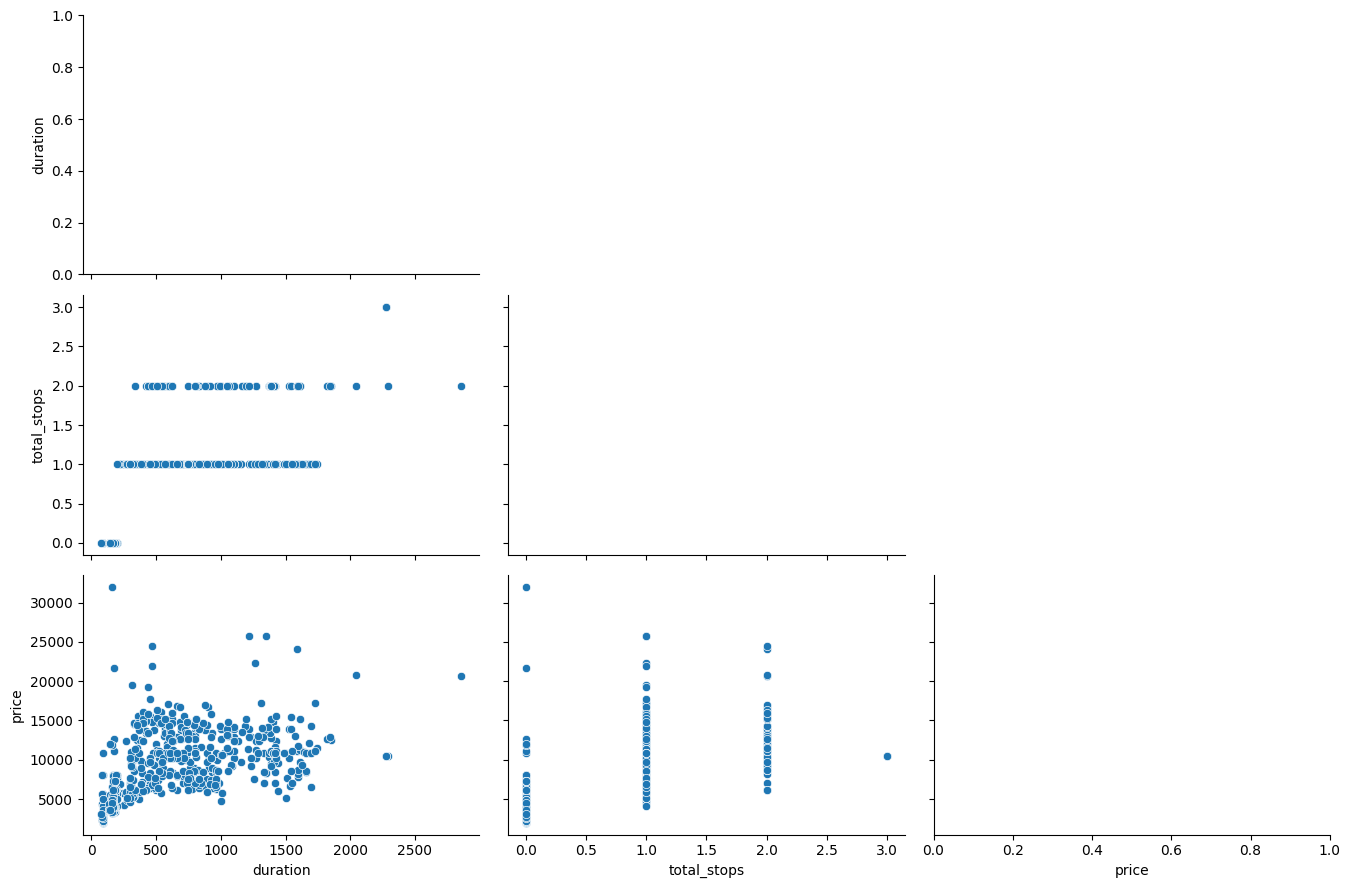

In [18]:
eda_helper_functions.pair_plots(train)

## 7. Correlation Analysis

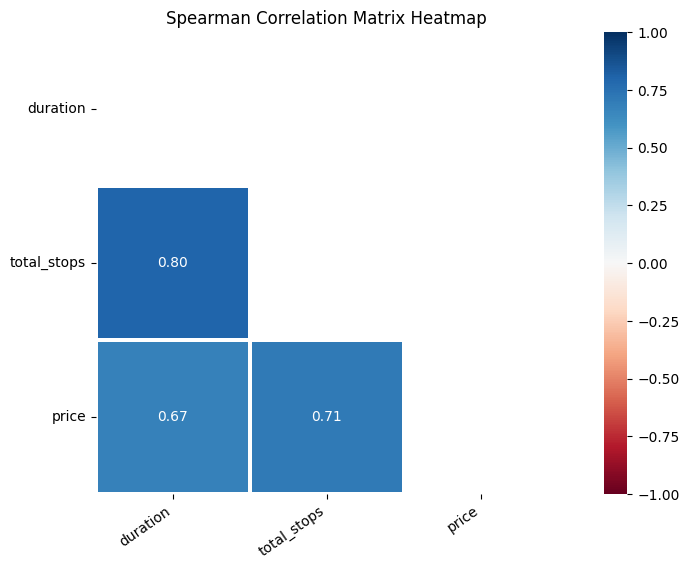

In [19]:
eda_helper_functions.correlation_heatmap(train)

In [20]:
train.dtypes

airline                    object
date_of_journey    datetime64[ns]
source                     object
destination                object
dep_time           datetime64[ns]
arrival_time       datetime64[ns]
duration                    int64
total_stops               float64
additional_info            object
price                       int64
dtype: object

In [21]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   airline          640 non-null    object        
 1   date_of_journey  640 non-null    datetime64[ns]
 2   source           640 non-null    object        
 3   destination      640 non-null    object        
 4   dep_time         640 non-null    datetime64[ns]
 5   arrival_time     640 non-null    datetime64[ns]
 6   duration         640 non-null    int64         
 7   total_stops      640 non-null    float64       
 8   additional_info  640 non-null    object        
 9   price            640 non-null    int64         
dtypes: datetime64[ns](3), float64(1), int64(2), object(4)
memory usage: 50.1+ KB


In [22]:
train.corr(method="spearman",numeric_only=True)

,duration,total_stops,price
duration,1.000000,0.803591,0.672493
total_stops,0.803591,1.000000,0.708917
price,0.672493,0.708917,1.000000


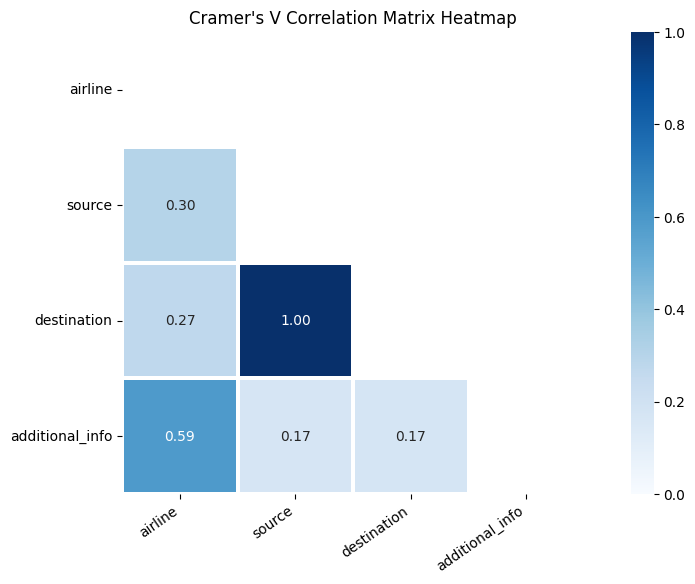

In [23]:
eda_helper_functions.cramersV_heatmap(train)

   ##  8  .Detailed Analysis

In [24]:
train.columns

Index(['airline', 'date_of_journey', 'source', 'destination', 'dep_time',
       'arrival_time', 'duration', 'total_stops', 'additional_info', 'price'],
      dtype='object')

###  8.1 Airline

In [25]:
train.airline.value_counts()

airline
Jet Airways          232
Indigo               116
Air India             97
Multiple Carriers     85
Spicejet              46
Vistara               32
Goair                 18
Air Asia              13
Trujet                 1
Name: count, dtype: int64

In [26]:
eda_helper_functions.cat_summary(train,"airline")

0                 Indigo
1            Jet Airways
2              Air India
3            Jet Airways
4                 Indigo
             ...        
635          Jet Airways
636               Indigo
637               Indigo
638    Multiple Carriers
639            Air India
Name: airline, Length: 640, dtype: object

Data Type      : object
Cardinality    : 9 categories
Missing Data   : 0 rows (0.00 %)
Available Data : 640 / 640 rows


,
count,640
unique,9
top,Jet Airways
freq,232


,count,percentage
category,,
Jet Airways,232,0.362500
Indigo,116,0.181250
Air India,97,0.151562
Multiple Carriers,85,0.132812
Spicejet,46,0.071875
Vistara,32,0.050000
Goair,18,0.028125
Air Asia,13,0.020313
Trujet,1,0.001563


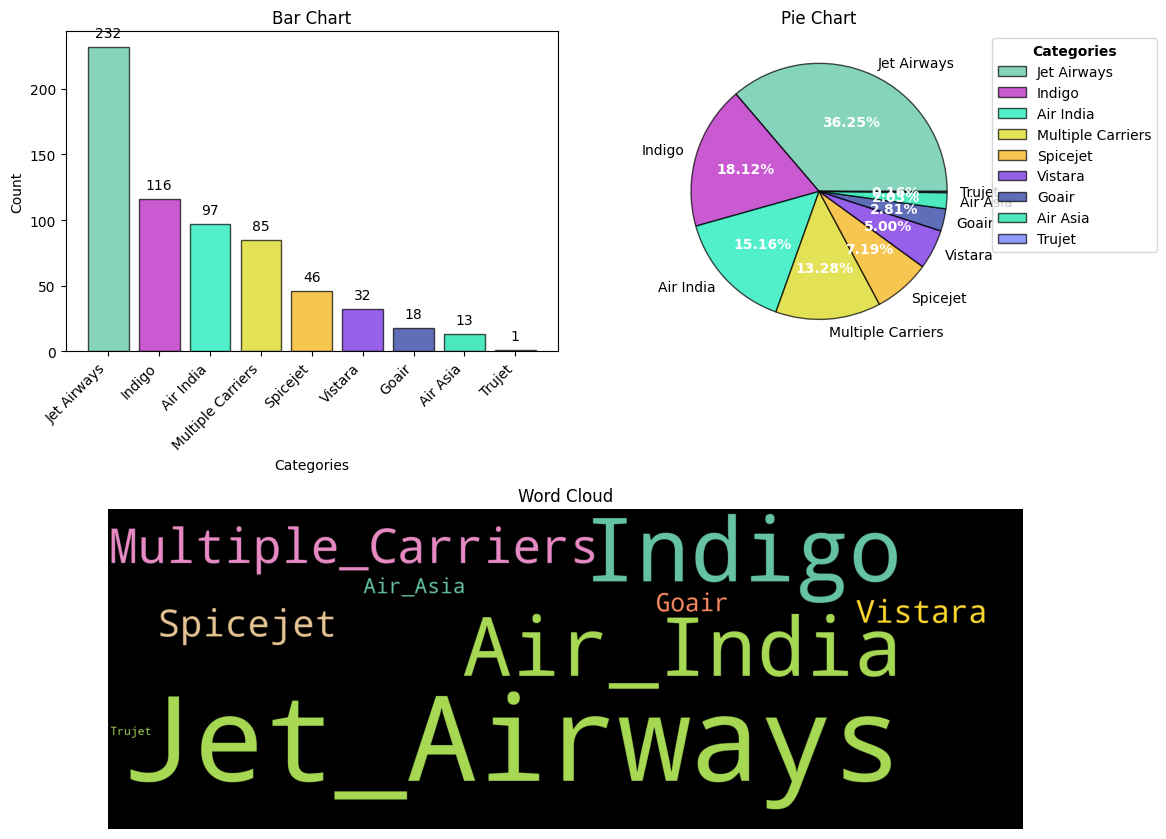

In [27]:
eda_helper_functions.cat_univar_plots(train,"airline")

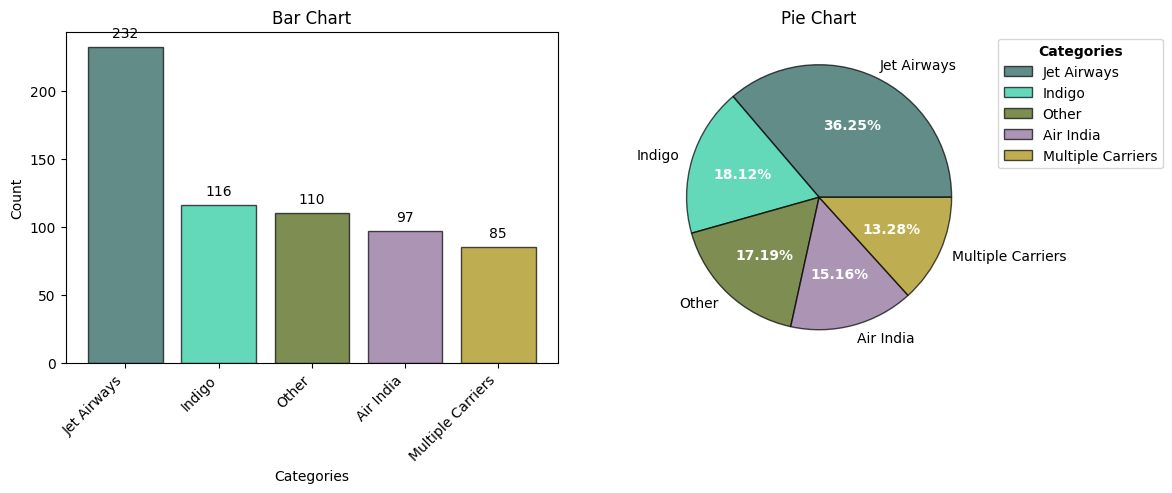

In [28]:
eda_helper_functions.cat_univar_plots(train,"airline",show_wordcloud=False,k=4)

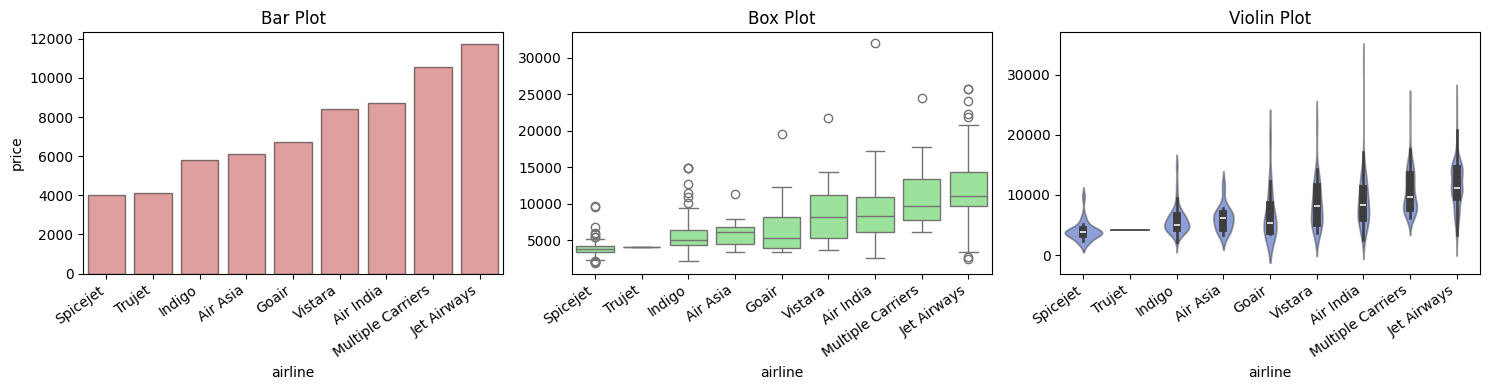

In [29]:
eda_helper_functions.num_cat_bivar_plots(
    data=train,
    num_var="price",
    cat_var="airline"
)

In [30]:
eda_helper_functions.num_cat_hyp_testing(train,"price","airline")

- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population mean
- Alternate Hypothesis : The groups don't have similar population mean
- Test Statistic       : 47.9139366752173
- p-value              : 2.6804880833568156e-60
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and airline are associated to each other


- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population median
- Alternate Hypothesis : The groups don't have similar population median
- Test Statistic       : 290.4729778040143
- p-value              : 4.3819911929579735e-58
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and airline are associated to each other


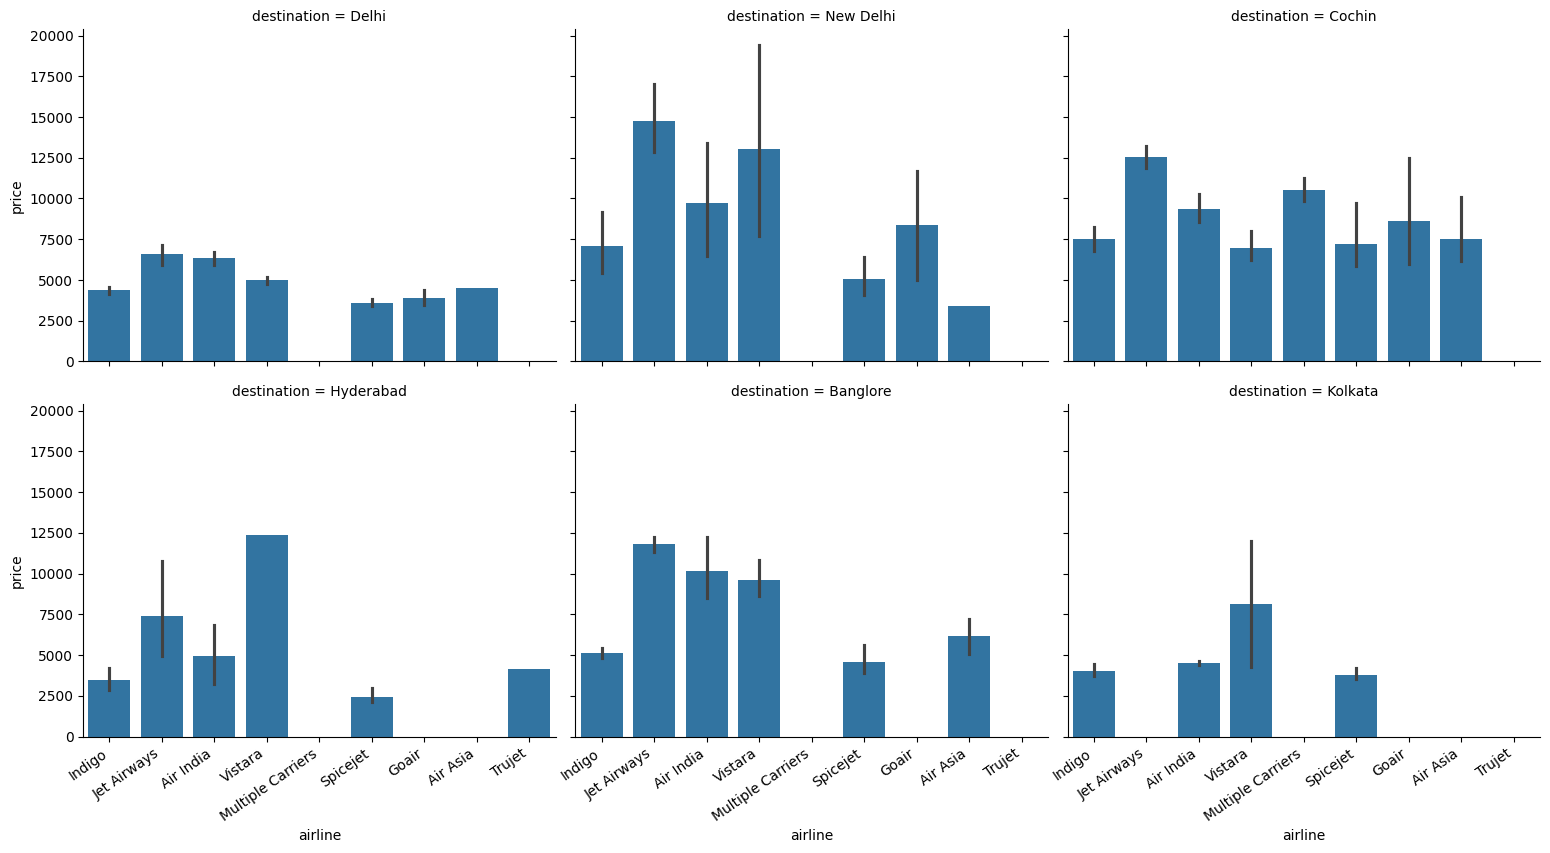

In [31]:
airline_grid=sns.FacetGrid(
    data=train,
    col="destination",
    col_wrap=3,
    height=4,
    aspect=1.3,
    sharey=True
)
airline_grid.map(sns.barplot,"airline","price",order=train.airline.unique())
for ax in airline_grid.axes[3:]:
    eda_helper_functions.rotate_xlabels(ax)

### 8.2 Date of Journey

In [32]:
train.date_of_journey

0     2019-05-03
1     2019-03-09
2     2019-05-09
3     2019-06-01
4     2019-06-18
         ...    
635   2019-05-27
636   2019-03-21
637   2019-03-15
638   2019-03-27
639   2019-05-27
Name: date_of_journey, Length: 640, dtype: datetime64[ns]

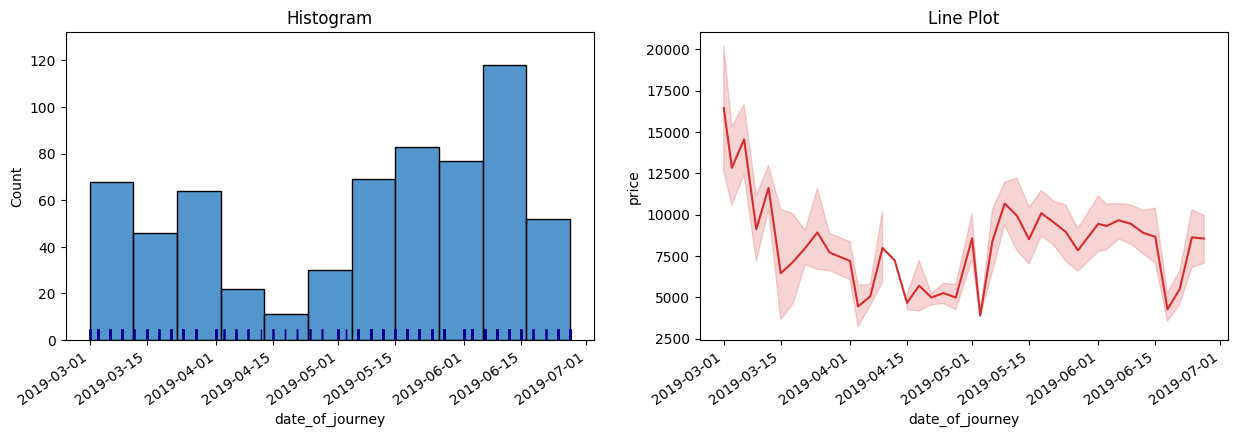

In [33]:
eda_helper_functions.dt_univar_plots(
    data=train,
    var="date_of_journey",
    target="price"
)

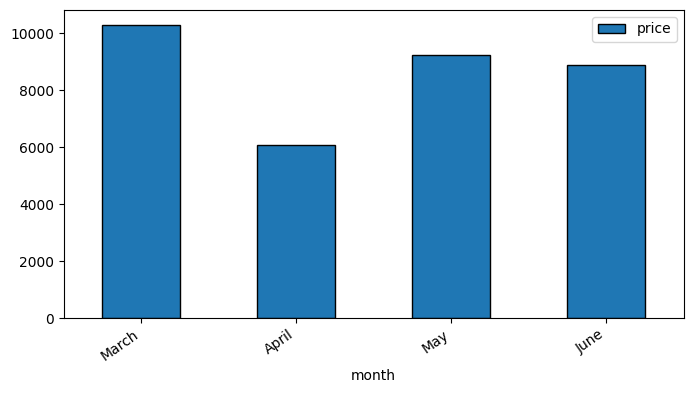

In [34]:
(
     train
     .groupby(pd.Grouper(key="date_of_journey",freq="M"))
     .price.mean()
     .to_frame()
     .set_axis(["March","April","May","June"],axis=0)
     .rename_axis(index="month")
     .plot(
         kind="bar",
         figsize=(8,4),
         edgecolor="black"
     )
)

ax=plt.gca()
eda_helper_functions.rotate_xlabels(ax)


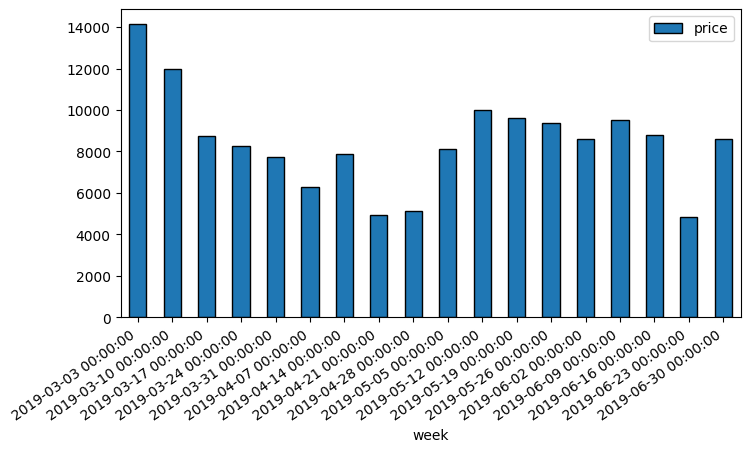

In [35]:
(
     train
     .groupby(pd.Grouper(key="date_of_journey",freq="W"))
     .price.mean()
     .to_frame()
     # .set_axis(["March","April","May","June"],axis=0)
     .rename_axis(index="week")
     .plot(
         kind="bar",
         figsize=(8,4),
         edgecolor="black"
     )
)

ax=plt.gca()
eda_helper_functions.rotate_xlabels(ax)


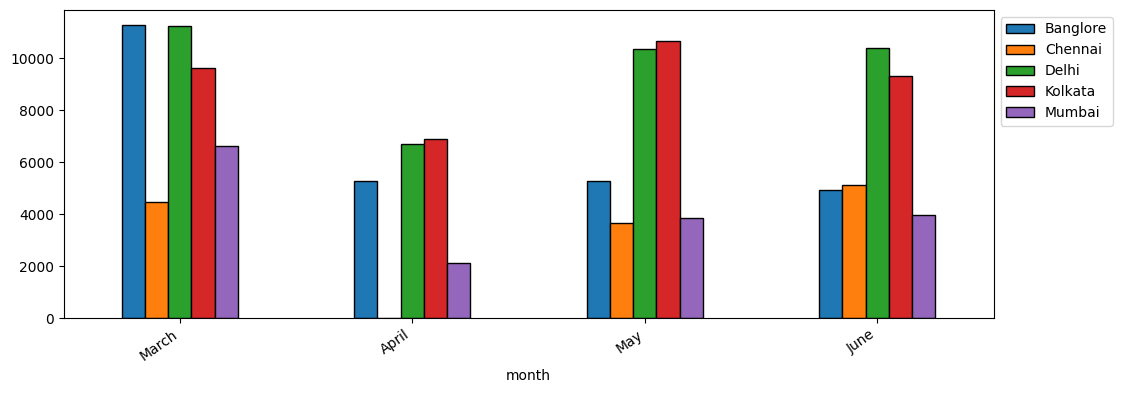

In [36]:
(
     train
     .groupby([pd.Grouper(key="date_of_journey",freq="M"),"source"])
     .price.mean()
     .unstack(fill_value=0) # for making source in cols from rows
     .set_axis(["March","April","May","June"],axis=0)
     .rename_axis(index="month")
     .plot(
         kind="bar",
         figsize=(12,4),
         edgecolor="black"
   )
)
ax=plt.gca()

ax.legend(
    loc="upper left",
    bbox_to_anchor=(1,1)
    
)
eda_helper_functions.rotate_xlabels(ax)

### 8.3 Dep_time

In [37]:
train.dep_time

0     2025-09-03 10:10:00
1     2025-09-03 08:00:00
2     2025-09-03 09:45:00
3     2025-09-03 11:40:00
4     2025-09-03 04:00:00
              ...        
635   2025-09-03 11:30:00
636   2025-09-03 14:25:00
637   2025-09-03 21:20:00
638   2025-09-03 12:50:00
639   2025-09-03 19:30:00
Name: dep_time, Length: 640, dtype: datetime64[ns]

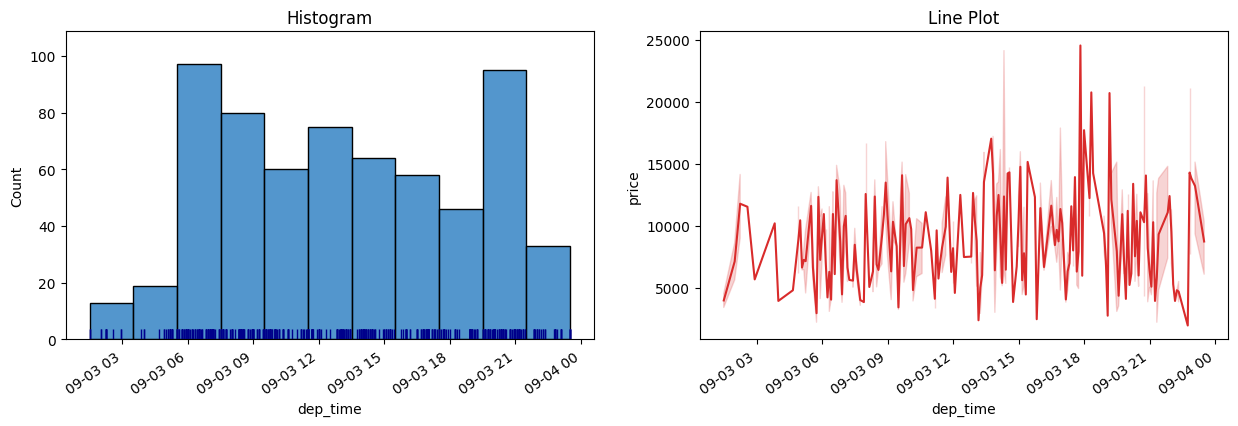

In [38]:
eda_helper_functions.dt_univar_plots(train,"dep_time","price")

In [39]:
(
    train
    .dep_time
    .dt.hour
    .pipe(lambda ser:pd.Series(np.select([ser.between(4,12,inclusive="left"),
                                ser.between(12,16,inclusive="left"),
                                ser.between(16,20,inclusive="left")],
                               ["morning","afternoon","evening"],
                               default="night")))
)

0        morning
1        morning
2        morning
3        morning
4        morning
         ...    
635      morning
636    afternoon
637        night
638    afternoon
639      evening
Length: 640, dtype: object

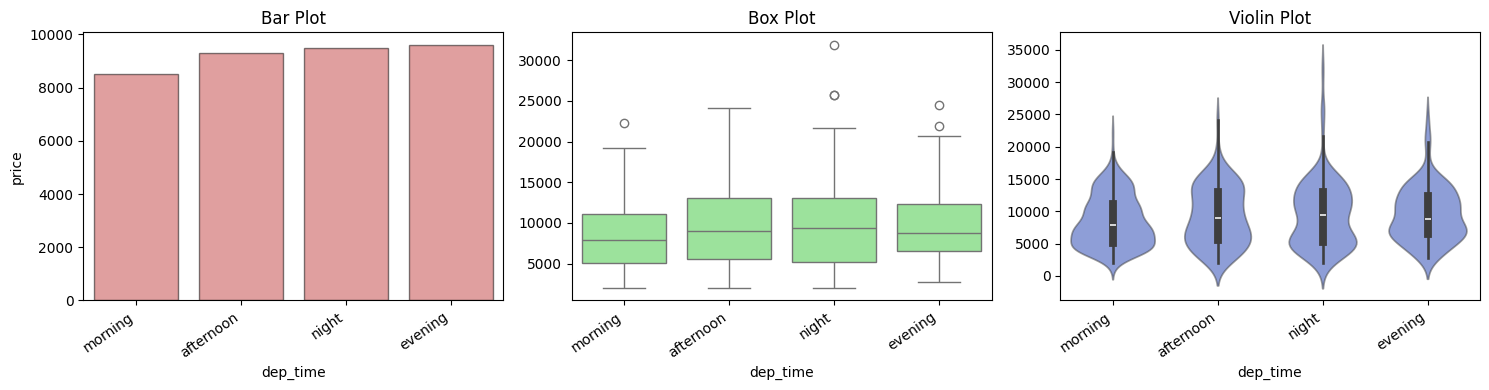

In [40]:
(
    train
    .assign(dep_time=lambda df_:(
        np.select([df_.dep_time.dt.hour.between(4,12,inclusive="left"),
                                df_.dep_time.dt.hour.between(12,16,inclusive="left"),
                               df_.dep_time.dt.hour.between(16,20,inclusive="left")],
                               ["morning","afternoon","evening"],
                               default="night")
    ))
    # .pipe(eda_helper_functions.cat_univar_plots,"dep_time")
    .pipe(eda_helper_functions.num_cat_bivar_plots,"price","dep_time")
)

### 8.4 durations

In [41]:
train.duration

0       170
1      1585
2       795
3       440
4       170
       ... 
635     450
636     300
637      85
638     385
639      75
Name: duration, Length: 640, dtype: int64

In [42]:
eda_helper_functions.num_summary(train,"duration")

0       170
1      1585
2       795
3       440
4       170
       ... 
635     450
636     300
637      85
638     385
639      75
Name: duration, Length: 640, dtype: int64

Data Type      : int64
Missing Data   : 0 rows (0.00 %)
Available Data : 640 / 640 rows


,value
percentile,
0,75.00
5,90.00
10,149.50
25,175.00
50,480.00
75,886.25
90,1390.00
95,1551.00
99,1835.25


,value
mean,608.265625
trimmed mean (5%),572.352431
trimmed mean (10%),544.414062
median,480.000000


,value
var,234663.340914
std,484.420624
IQR,711.250000
mad,310.000000
coef_variance,0.796397


,value
skewness,1.053247
kurtosis,0.630881


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
p-value              : 8.273072376819771e-22
Test Statistic       : 0.8802154707917256
- Since p-value is less than alpha (0.05), we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
Critical Value       : 0.782
Test Statistic       : 24.038625953506426
- Since the Test-statistic is greater than Critical Value, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


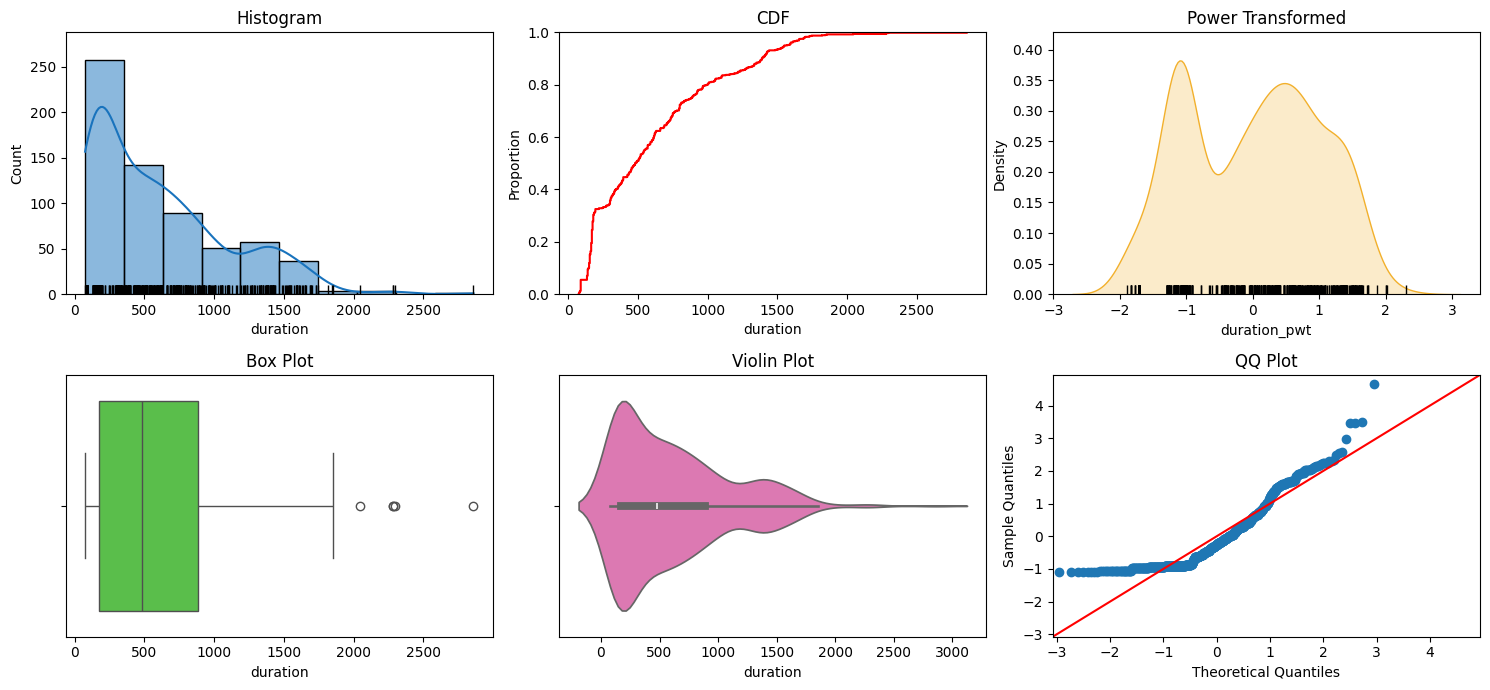

In [43]:
eda_helper_functions.num_univar_plots(train,"duration")

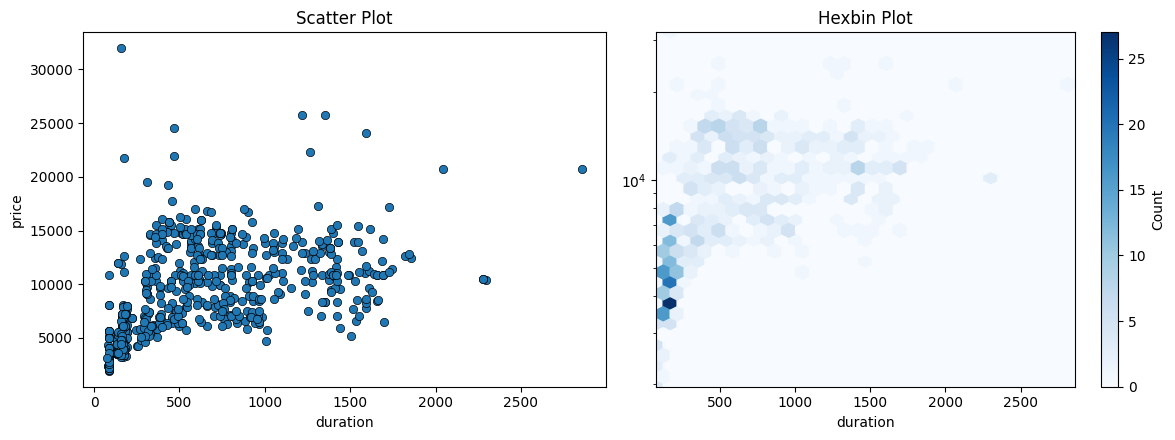

In [44]:
eda_helper_functions.num_bivar_plots(
    train,"duration","price",
    hexbin_kwargs=dict(
        yscale="log",
        gridsize=30,
        cmap="Blues"
    )
)

In [45]:
eda_helper_functions.num_num_hyp_testing(train,"price","duration")

- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 0.5107722658858674
- p-value              : 8.086185437406954e-44
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and duration are correlated


- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 0.67249314021042
- p-value              : 1.9027758933790917e-85
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and duration are correlated


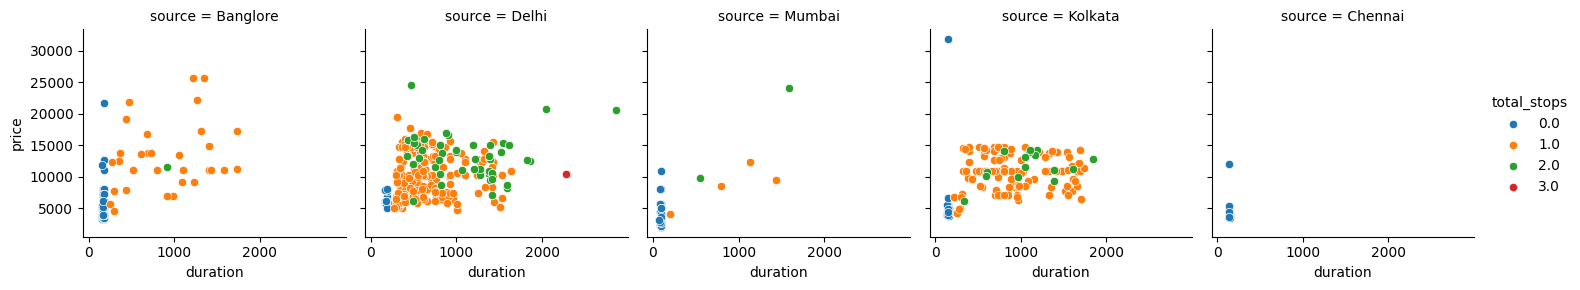

In [46]:
duration_grid=sns.FacetGrid(
    data=train,
    col="source",
    hue="total_stops",
    sharey=True
)
duration_grid.map(sns.scatterplot,"duration","price")

duration_grid.add_legend()

## 9.Automated EDA

In [48]:
eda_helper_functions.get_iqr_outliers(train,"duration")

Lower Limit : -891.875
Upper Limit : 1953.125


,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
514,Jet Airways,2019-03-03,Delhi,Cochin,2025-09-03 18:20:00,2025-09-03 04:25:00,2045,2.0,No Info,20747
296,Air India,2019-06-03,Delhi,Cochin,2025-09-03 05:15:00,2025-09-03 19:15:00,2280,3.0,No Info,10493
512,Air India,2019-06-24,Delhi,Cochin,2025-09-03 05:15:00,2025-09-03 19:15:00,2280,3.0,No Info,10493
140,Air India,2019-05-09,Delhi,Cochin,2025-09-03 05:00:00,2025-09-03 19:15:00,2295,2.0,No Info,10441
489,Jet Airways,2019-03-06,Delhi,Cochin,2025-09-03 19:10:00,2025-09-03 18:50:00,2860,2.0,No Info,20694
